# Lab 6

You are tasked with evaluating card counting strategies for black jack. In order to do so, you will use object oriented programming to create a playable casino style black jack game where a computer dealer plays against $n$ computer players and possibily one human player. If you don't know the rules of blackjack or card counting, please google it.

A few requirements:
* The game should utilize multiple 52-card decks. Typically the game is played with 6 decks.
* Players should have chips.
* Dealer's actions are predefined by rules of the game (typically hit on 16).
* The players should be aware of all shown cards so that they can count cards.
* Each player could have a different strategy.
* The system should allow you to play large numbers of games, study the outcomes, and compare average winnings per hand rate for different strategies.

1. Begin by creating a classes to represent cards and decks. The deck should support more than one 52-card set. The deck should allow you to shuffle and draw cards. Include a "plastic" card, placed randomly in the deck. Later, when the plastic card is dealt, shuffle the cards before the next deal.

In [1]:
class Card:
    def __init__(self, suit, value):
        self.suit = suit
        self.value = value

    def __repr__(self):
        return f"{self.value} of {self.suit}"
import random

class Deck:
    def __init__(self, num_decks=6):
        self.num_decks = num_decks
        self.cards = []
        self.plastic_card_index = None
        self._create_deck()
        self.shuffle()

    def _create_deck(self):
        """Creates a deck with the specified number of 52-card sets."""
        suits = ['Hearts', 'Diamonds', 'Clubs', 'Spades']
        values = ['2', '3', '4', '5', '6', '7', '8', '9', '10', 'J', 'Q', 'K', 'A']

        self.cards = [Card(suit, value) for suit in suits for value in values] * self.num_decks


        self.plastic_card = Card("Plastic", "Plastic")

    def shuffle(self):
        """Shuffles the deck and places the plastic card randomly."""
        random.shuffle(self.cards)
        self.plastic_card_index = random.randint(0, len(self.cards) - 1)
        self.cards.insert(self.plastic_card_index, self.plastic_card)

    def deal_card(self):
        """Deals the top card from the deck."""
        if len(self.cards) == 0:
            raise ValueError("No cards left to deal.")

        card = self.cards.pop(0)

        if card == self.plastic_card:
            print("Plastic card dealt. Reshuffling deck for next deal.")
            self.shuffle()

        return card

    def remaining_cards(self):
        """Returns the number of cards left in the deck."""
        return len(self.cards)


In [2]:
deck = Deck(num_decks=6)

for i in range(10):
    card = deck.deal_card()
    print(card)

print(f"Remaining cards in deck: {deck.remaining_cards()}")



4 of Spades
4 of Hearts
8 of Hearts
5 of Spades
7 of Hearts
6 of Hearts
10 of Spades
J of Diamonds
4 of Spades
K of Diamonds
Remaining cards in deck: 303


2. Now design your game on a UML diagram. You may want to create classes to represent, players, a hand, and/or the game. As you work through the lab, update your UML diagram. At the end of the lab, submit your diagram (as pdf file) along with your notebook.

3. Begin with implementing the skeleton (ie define data members and methods/functions, but do not code the logic) of the classes in your UML diagram.

In [ ]:

class Deck:
    def __init__(self):
        self.cards = []  
        self.needs_reshuffle = False 

    def shuffle(self):
        pass

    def deal_card(self):
        pass



class Card:
    def __init__(self, suit, rank, value):
        self.suit = suit  
        self.rank = rank  
        self.value = value  



class Dealer:
    def __init__(self):
        self.hand = []  

    def add_card(self, card):
        pass

    def clear_hand(self):
        pass

    def play(self, deck):
        pass



class Player:
    def __init__(self, name):
        self.name = name 
        self.hand = []  
        self.chips = 1000

    def add_card(self, card):
        pass

    def clear_hand(self):
        pass

    def play(self, deck):
        pass


class ConservativePlusPlayer(Player):
    def __init__(self, name, hit_threshold=-2):
        super().__init__(name)
        self.hit_threshold = hit_threshold  
        self.seen_card_sum = 0 

    def update_seen_card_sum(self, card):
        pass

    def play(self, deck):
        pass



class BlackjackGameWithStrategyPlayer:
    def __init__(self, verbose=False):
        self.deck = Deck() 
        self.dealer = Dealer()  
        self.strategy_player = Player("Strategy Player") 
        self.players = []  
        self.verbose = verbose 

    def play_round(self):
        pass

    def determine_winner(self):
        pass

    def play_game(self, rounds):
        pass


4. Complete the implementation by coding the logic of all functions. For now, just implement the dealer player and human player.

In [1]:
import random

class Card:
    def __init__(self, suit, value):
        self.suit = suit
        self.value = value

    def __repr__(self):
        return f"{self.value} of {self.suit}"

class Deck:
    def __init__(self, num_decks=6):
        self.num_decks = num_decks
        self.cards = []
        self.plastic_card_index = None
        self._create_deck()
        self.shuffle()

    def _create_deck(self):
        """Creates a deck with the specified number of 52-card sets."""
        suits = ['Hearts', 'Diamonds', 'Clubs', 'Spades']
        values = ['2', '3', '4', '5', '6', '7', '8', '9', '10', 'J', 'Q', 'K', 'A']
        self.cards = [Card(suit, value) for suit in suits for value in values] * self.num_decks

        self.plastic_card = Card("Plastic", "Plastic")

    def shuffle(self):
        """Shuffles the deck and places the plastic card randomly."""
        random.shuffle(self.cards)
        self.plastic_card_index = random.randint(0, len(self.cards) - 1)
        self.cards.insert(self.plastic_card_index, self.plastic_card)

    def deal_card(self):
        """Deals the top card from the deck."""
        if len(self.cards) == 0:
            raise ValueError("No cards left to deal.")

        card = self.cards.pop(0)

        if card == self.plastic_card:
            print("Plastic card dealt. Reshuffling deck for next deal.")
            self.shuffle()

        return card

    def remaining_cards(self):
        """Returns the number of cards left in the deck."""
        return len(self.cards)

class Player:
    def __init__(self, name, chips=1000):
        self.name = name
        self.chips = chips
        self.hand = []

    def add_card(self, card):
        """Add a card to the player's hand."""
        self.hand.append(card)

    def clear_hand(self):
        """Clear the player's hand for a new round."""
        self.hand = []

    def hand_value(self):
        """Calculates the value of the player's hand."""
        value = 0
        aces = 0
        for card in self.hand:
            if card.value in ['J', 'Q', 'K']:
                value += 10
            elif card.value == 'A':
                value += 11
                aces += 1
            else:
                value += int(card.value)

        while value > 21 and aces:
            value -= 10
            aces -= 1
        return value

    def is_busted(self):
        """Check if the player is busted (hand value > 21)."""
        return self.hand_value() > 21

class Dealer(Player):
    def __init__(self):
        super().__init__(name="Dealer")

    def play(self, deck):
        """Dealer plays by predefined rules (hit on 16 or below, stand on 17 or higher)."""
        while self.hand_value() < 17:
            self.add_card(deck.deal_card())
        return self.hand_value()

class HumanPlayer(Player):
    def __init__(self, name, chips=1000):
        super().__init__(name=name, chips=chips)

    def play(self, deck):
        """Human player's turn."""
        while True:
            print(f"\n{self.name}'s hand: {self.hand} (value: {self.hand_value()})")
            if self.is_busted():
                print(f"{self.name} busted!")
                break

            choice = input("Would you like to hit or stand? (h/s): ").lower()
            if choice == 'h':
                self.add_card(deck.deal_card())
            elif choice == 's':
                break
            else:
                print("Invalid choice. Please enter 'h' to hit or 's' to stand.")

class BlackjackGame:
    def __init__(self):
        self.deck = Deck()
        self.dealer = Dealer()
        self.human_player = HumanPlayer(name="You")

    def play_round(self):
        """Plays one round of blackjack."""
        print("\n=== New Round ===")
        self.dealer.clear_hand()
        self.human_player.clear_hand()

        for _ in range(2):
            self.human_player.add_card(self.deck.deal_card())
            self.dealer.add_card(self.deck.deal_card())

        self.human_player.play(self.deck)

        if not self.human_player.is_busted():
            print(f"\nDealer's hand: {self.dealer.hand} (value: {self.dealer.hand_value()})")
            self.dealer.play(self.deck)
            print(f"Dealer's final hand: {self.dealer.hand} (value: {self.dealer.hand_value()})")

        self.determine_winner()

    def determine_winner(self):
        """Determines the winner of the round."""
        human_value = self.human_player.hand_value()
        dealer_value = self.dealer.hand_value()

        if self.human_player.is_busted():
            print("Dealer wins!")
        elif self.dealer.is_busted() or human_value > dealer_value:
            print(f"{self.human_player.name} wins!")
        elif human_value < dealer_value:
            print("Dealer wins!")
        else:
            print("It's a tie!")



5.  Test. Demonstrate game play. For example, create a game of several dealer players and show that the game is functional through several rounds.

In [2]:
if __name__ == "__main__":
    game = BlackjackGame()
    game.play_round()



=== New Round ===

You's hand: [5 of Hearts, 5 of Clubs] (value: 10)
Would you like to hit or stand? (h/s): h

You's hand: [5 of Hearts, 5 of Clubs, 10 of Hearts] (value: 20)
Would you like to hit or stand? (h/s): s

Dealer's hand: [7 of Hearts, 2 of Diamonds] (value: 9)
Dealer's final hand: [7 of Hearts, 2 of Diamonds, 3 of Hearts, 8 of Hearts] (value: 20)
It's a tie!


6. Implement a new player with the following strategy:

    * Assign each card a value:
        * Cards 2 to 6 are +1
        * Cards 7 to 9 are 0
        * Cards 10 through Ace are -1
    * Compute the sum of the values for all cards seen so far.
    * Hit if sum is very negative, stay if sum is very positive. Select a threshold for hit/stay, e.g. 0 or -2.  

In [3]:
class CountingPlayer(Player):
    def __init__(self, name, chips=1000, hit_threshold=-2):
        super().__init__(name=name, chips=chips)
        self.seen_card_sum = 0
        self.hit_threshold = hit_threshold

    def card_value(self, card):
        """Assigns card counting values to each card."""
        if card.value in ['2', '3', '4', '5', '6']:
            return 1
        elif card.value in ['7', '8', '9']:
            return 0
        else:
            return -1

    def update_seen_card_sum(self, card):
        """Updates the card counting sum based on the card dealt."""
        self.seen_card_sum += self.card_value(card)

    def play(self, deck):
        """CountingPlayer's turn based on card counting strategy."""
        while True:
            print(f"\n{self.name}'s hand: {self.hand} (value: {self.hand_value()})")
            if self.is_busted():
                print(f"{self.name} busted!")
                break


            if self.seen_card_sum <= self.hit_threshold:
                print(f"{self.name} chooses to hit (card count sum: {self.seen_card_sum})")
                new_card = deck.deal_card()
                self.add_card(new_card)
                self.update_seen_card_sum(new_card)
            else:
                print(f"{self.name} chooses to stay (card count sum: {self.seen_card_sum})")
                break



class BlackjackGameWithCountingPlayer(BlackjackGame):
    def __init__(self):
        self.deck = Deck()
        self.dealer = Dealer()
        self.human_player = HumanPlayer(name="You")
        self.counting_player = CountingPlayer(name="Card Counter")

    def play_round(self):
        """Plays one round of blackjack with a counting player."""
        print("\n=== New Round ===")
        self.dealer.clear_hand()
        self.human_player.clear_hand()
        self.counting_player.clear_hand()
        self.counting_player.seen_card_sum = 0  


        for _ in range(2):
            human_card = self.deck.deal_card()
            self.human_player.add_card(human_card)

            counting_card = self.deck.deal_card()
            self.counting_player.add_card(counting_card)
            self.counting_player.update_seen_card_sum(counting_card) 

            dealer_card = self.deck.deal_card()
            self.dealer.add_card(dealer_card)
            self.counting_player.update_seen_card_sum(dealer_card)  

        self.human_player.play(self.deck)


        self.counting_player.play(self.deck)


        if not self.human_player.is_busted():
            print(f"\nDealer's hand: {self.dealer.hand} (value: {self.dealer.hand_value()})")
            self.dealer.play(self.deck)
            print(f"Dealer's final hand: {self.dealer.hand} (value: {self.dealer.hand_value()})")


        self.determine_winner()

    def determine_winner(self):
        """Determines the winner of the round for both players."""
        human_value = self.human_player.hand_value()
        dealer_value = self.dealer.hand_value()
        counting_value = self.counting_player.hand_value()

        print("\n=== Results ===")
        if self.human_player.is_busted():
            print("Dealer wins against the human player!")
        elif self.dealer.is_busted() or human_value > dealer_value:
            print(f"{self.human_player.name} wins!")
        elif human_value < dealer_value:
            print("Dealer wins against the human player!")
        else:
            print("It's a tie with the human player!")

        if self.counting_player.is_busted():
            print("Dealer wins against the card counting player!")
        elif self.dealer.is_busted() or counting_value > dealer_value:
            print(f"{self.counting_player.name} wins!")
        elif counting_value < dealer_value:
            print("Dealer wins against the card counting player!")
        else:
            print("It's a tie with the card counting player!")


In [4]:
if __name__ == "__main__":
    game = BlackjackGameWithCountingPlayer()
    game.play_round()


=== New Round ===

You's hand: [5 of Hearts, 5 of Diamonds] (value: 10)
Would you like to hit or stand? (h/s): h

You's hand: [5 of Hearts, 5 of Diamonds, 9 of Hearts] (value: 19)
Would you like to hit or stand? (h/s): s

Card Counter's hand: [10 of Hearts, K of Spades] (value: 20)
Card Counter chooses to hit (card count sum: -2)

Card Counter's hand: [10 of Hearts, K of Spades, 9 of Spades] (value: 29)
Card Counter busted!

Dealer's hand: [Q of Spades, 2 of Hearts] (value: 12)
Dealer's final hand: [Q of Spades, 2 of Hearts, K of Hearts] (value: 22)

=== Results ===
You wins!
Dealer wins against the card counting player!


7. Create a test scenario where one player, using the above strategy, is playing with a dealer and 3 other players that follow the dealer's strategy. Each player starts with same number of chips. Play 50 rounds (or until the strategy player is out of money). Compute the strategy player's winnings. You may remove unnecessary printouts from your code (perhaps implement a verbose/quiet mode) to reduce the output.

In [11]:
import random

class Deck:
    def __init__(self):
        self.cards = self._generate_deck()
        self.needs_reshuffle = False

    def _generate_deck(self):
        suits = ["hearts", "diamonds", "clubs", "spades"]
        ranks = ["2", "3", "4", "5", "6", "7", "8", "9", "10", "J", "Q", "K", "A"]
        values = {"2": 2, "3": 3, "4": 4, "5": 5, "6": 6, "7": 7, "8": 8, "9": 9, "10": 10,
                  "J": 10, "Q": 10, "K": 10, "A": 11}
        return [Card(suit, rank, values[rank]) for suit in suits for rank in ranks]

    def shuffle(self):
        random.shuffle(self.cards)
        self.needs_reshuffle = False

    def deal_card(self):
        if not self.cards:
            self.cards = self._generate_deck()
            self.shuffle()
            self.needs_reshuffle = True
        return self.cards.pop()


class Card:
    def __init__(self, suit, rank, value):
        self.suit = suit
        self.rank = rank
        self.value = value


class Dealer:
    def __init__(self):
        self.hand = []
        self.chips = 1000  

    def add_card(self, card):
        self.hand.append(card)

    def clear_hand(self):
        self.hand = []

    def play(self, deck):
        while sum(card.value for card in self.hand) <= 16:
            self.add_card(deck.deal_card())


class Player:
    def __init__(self, name):
        self.name = name
        self.hand = []
        self.chips = 1000  

    def add_card(self, card):
        self.hand.append(card)

    def clear_hand(self):
        self.hand = []

    def play(self, deck):
        pass  


class ConservativePlusPlayer(Player):
    def __init__(self, name, hit_threshold=-2):
        super().__init__(name)
        self.hit_threshold = hit_threshold
        self.seen_card_sum = 0

    def update_seen_card_sum(self, card):
        if card.rank in ["2", "3", "4", "5", "6"]:
            self.seen_card_sum += 1
        elif card.rank in ["10", "J", "Q", "K", "A"]:
            self.seen_card_sum -= 1

    def play(self, deck):
        while sum(card.value for card in self.hand) < 17 and self.seen_card_sum >= self.hit_threshold:
            self.add_card(deck.deal_card())


class BlackjackGameWithStrategyPlayer:
    def __init__(self, verbose=False):
        self.deck = Deck()
        self.dealer = Dealer()
        self.strategy_player = ConservativePlusPlayer(name="Strategy Player")
        self.players = [Player(f"Player {i+1}") for i in range(3)]
        self.verbose = verbose

    def play_round(self):
        self.dealer.clear_hand()
        for player in self.players:
            player.clear_hand()
        self.strategy_player.clear_hand()

        for _ in range(2):
            for player in self.players:
                player.add_card(self.deck.deal_card())
            self.strategy_player.add_card(self.deck.deal_card())
            self.dealer.add_card(self.deck.deal_card())

        
        for player in self.players:
            player.play(self.deck)

        self.strategy_player.play(self.deck)

       
        self.dealer.play(self.deck)

        dealer_total = sum(card.value for card in self.dealer.hand)
        strategy_total = sum(card.value for card in self.strategy_player.hand)

        if strategy_total <= 21 and (dealer_total > 21 or strategy_total > dealer_total):
            self.strategy_player.chips += 10  
        elif strategy_total > 21 or (dealer_total <= 21 and dealer_total >= strategy_total):
            self.strategy_player.chips -= 10  

    def play_game(self, rounds):
        for round_num in range(1, rounds + 1):
            if self.strategy_player.chips <= 0:
                if self.verbose:
                    print("Strategy player is out of money!")
                break
            if self.verbose:
                print(f"Playing round {round_num}")
            self.play_round()

        
        return self.strategy_player.chips



game = BlackjackGameWithStrategyPlayer(verbose=False)
final_chips = game.play_game(50) 
print(f"Strategy Player's final winnings: {final_chips} chips")


Strategy Player's final winnings: 820 chips


8. Create a loop that runs 100 games of 50 rounds, as setup in previous question, and store the strategy player's chips at the end of the game (aka "winnings") in a list. Histogram the winnings. What is the average winnings per round? What is the standard deviation. What is the probabilty of net winning or lossing after 50 rounds?


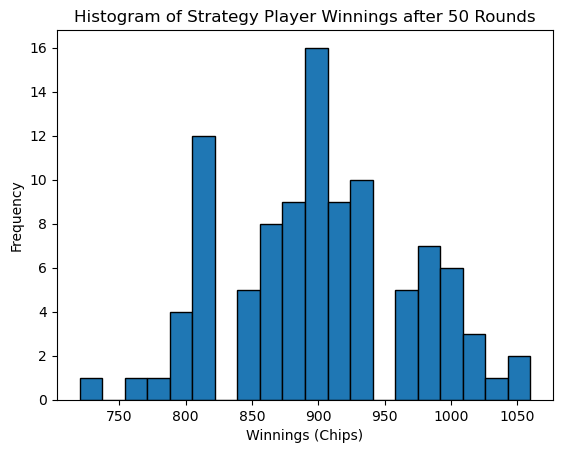

(18.052, 68.79854649627417, 0.06, 0.88)

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import random

class Deck:
    def __init__(self):
        self.cards = self._generate_deck()
        self.needs_reshuffle = False

    def _generate_deck(self):
        suits = ["hearts", "diamonds", "clubs", "spades"]
        ranks = ["2", "3", "4", "5", "6", "7", "8", "9", "10", "J", "Q", "K", "A"]
        values = {"2": 2, "3": 3, "4": 4, "5": 5, "6": 6, "7": 7, "8": 8, "9": 9, "10": 10,
                  "J": 10, "Q": 10, "K": 10, "A": 11}
        return [Card(suit, rank, values[rank]) for suit in suits for rank in ranks]

    def shuffle(self):
        random.shuffle(self.cards)
        self.needs_reshuffle = False

    def deal_card(self):
        if not self.cards:
            self.cards = self._generate_deck()
            self.shuffle()
            self.needs_reshuffle = True
        return self.cards.pop()


class Card:
    def __init__(self, suit, rank, value):
        self.suit = suit
        self.rank = rank
        self.value = value


class Dealer:
    def __init__(self):
        self.hand = []
        self.chips = 1000  

    def add_card(self, card):
        self.hand.append(card)

    def clear_hand(self):
        self.hand = []

    def play(self, deck):
        while sum(card.value for card in self.hand) <= 16:
            self.add_card(deck.deal_card())


class Player:
    def __init__(self, name):
        self.name = name
        self.hand = []
        self.chips = 1000 

    def add_card(self, card):
        self.hand.append(card)

    def clear_hand(self):
        self.hand = []

    def play(self, deck):
        pass  


class ConservativePlusPlayer(Player):
    def __init__(self, name, hit_threshold=-2):
        super().__init__(name)
        self.hit_threshold = hit_threshold
        self.seen_card_sum = 0

    def update_seen_card_sum(self, card):
        if card.rank in ["2", "3", "4", "5", "6"]:
            self.seen_card_sum += 1
        elif card.rank in ["10", "J", "Q", "K", "A"]:
            self.seen_card_sum -= 1

    def play(self, deck):
        while sum(card.value for card in self.hand) < 17 and self.seen_card_sum >= self.hit_threshold:
            self.add_card(deck.deal_card())


class BlackjackGameWithStrategyPlayer:
    def __init__(self, verbose=False):
        self.deck = Deck()
        self.dealer = Dealer()
        self.strategy_player = ConservativePlusPlayer(name="Strategy Player")
        self.players = [Player(f"Player {i+1}") for i in range(3)]
        self.verbose = verbose

    def play_round(self):
        # Reset hands
        self.dealer.clear_hand()
        for player in self.players:
            player.clear_hand()
        self.strategy_player.clear_hand()

        for _ in range(2):
            for player in self.players:
                player.add_card(self.deck.deal_card())
            self.strategy_player.add_card(self.deck.deal_card())
            self.dealer.add_card(self.deck.deal_card())

       
        for player in self.players:
            player.play(self.deck)  

      
        self.strategy_player.play(self.deck)

      
        self.dealer.play(self.deck)

        
        dealer_total = sum(card.value for card in self.dealer.hand)
        strategy_total = sum(card.value for card in self.strategy_player.hand)

       
        if strategy_total <= 21 and (dealer_total > 21 or strategy_total > dealer_total):
            self.strategy_player.chips += 10 
        elif strategy_total > 21 or (dealer_total <= 21 and dealer_total >= strategy_total):
            self.strategy_player.chips -= 10 

    def play_game(self, rounds):
        for round_num in range(1, rounds + 1):
            if self.strategy_player.chips <= 0:
                break
            self.play_round()

        return self.strategy_player.chips


def simulate_games(num_games=100, rounds_per_game=50):
    winnings = []

    for _ in range(num_games):
        game = BlackjackGameWithStrategyPlayer(verbose=False)
        final_chips = game.play_game(rounds_per_game)
        winnings.append(final_chips)  

    return winnings


winnings = simulate_games()


plt.hist(winnings, bins=20, edgecolor='black')
plt.title('Histogram of Strategy Player Winnings after 50 Rounds')
plt.xlabel('Winnings (Chips)')
plt.ylabel('Frequency')
plt.show()

average_winnings_per_game = np.mean(winnings)
average_winnings_per_round = average_winnings_per_game / 50  # Since each game has 50 rounds
standard_deviation_winnings = np.std(winnings)
prob_net_win = np.sum(np.array(winnings) > 1000) / len(winnings)
prob_net_loss = np.sum(np.array(winnings) < 1000) / len(winnings)

average_winnings_per_round, standard_deviation_winnings, prob_net_win, prob_net_loss


9. Repeat previous questions scanning the value of the threshold. Try at least 5 different threshold values. Can you find an optimal value?

In [15]:

def simulate_games_with_threshold(num_games=100, rounds_per_game=50, hit_threshold=-2):
    """Simulate games with a specific hit threshold for the ConservativePlusPlayer."""
    winnings = []

    for _ in range(num_games):
        game = BlackjackGameWithStrategyPlayer(verbose=False)
        game.strategy_player.hit_threshold = hit_threshold
        final_chips = game.play_game(rounds_per_game)
        winnings.append(final_chips)  
    return winnings


threshold_values = [-6, -4, -2, 0, 2]
results = {}

for threshold in threshold_values:
    winnings = simulate_games_with_threshold(num_games=100, rounds_per_game=50, hit_threshold=threshold)
    average_winnings_per_game = np.mean(winnings)
    average_winnings_per_round = average_winnings_per_game / 50
    standard_deviation_winnings = np.std(winnings)
    prob_net_win = np.sum(np.array(winnings) > 1000) / len(winnings)
    prob_net_loss = np.sum(np.array(winnings) < 1000) / len(winnings)

    results[threshold] = {
        "average_winnings_per_game": average_winnings_per_game,
        "average_winnings_per_round": average_winnings_per_round,
        "standard_deviation": standard_deviation_winnings,
        "prob_net_win": prob_net_win,
        "prob_net_loss": prob_net_loss
    }

import pandas as pd

results_df = pd.DataFrame(results).T
results_df





,average_winnings_per_game,average_winnings_per_round,standard_deviation,prob_net_win,prob_net_loss
-6,905.4,18.108,59.454520,0.03,0.95
-4,913.0,18.260,67.549981,0.07,0.88
-2,909.0,18.180,62.633857,0.04,0.90
0,909.8,18.196,67.438565,0.10,0.88
2,926.2,18.524,66.193353,0.11,0.86


10. Create a new strategy based on web searches or your own ideas. Demonstrate that the new strategy will result in increased or decreased winnings.

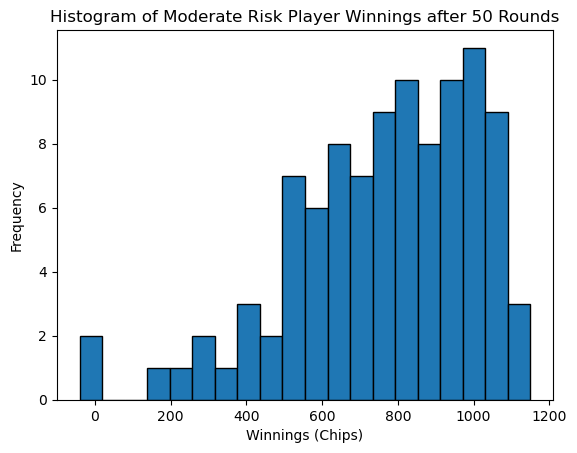

(15.286, 247.1730365553654, 0.15, 0.82)

In [16]:
import random

class ModerateRiskPlayer(Player):
    def __init__(self, name, base_bet=10):
        super().__init__(name)
        self.seen_card_sum = 0
        self.current_bet = base_bet
        self.base_bet = base_bet

    def update_seen_card_sum(self, card):
        if card.rank in ["2", "3", "4", "5", "6"]:
            self.seen_card_sum += 1
        elif card.rank in ["10", "J", "Q", "K", "A"]:
            self.seen_card_sum -= 1

    def adjust_bet(self, win):
        if win:
            self.current_bet = self.base_bet
        else:
            self.current_bet += self.base_bet

    def play(self, deck):
        while sum(card.value for card in self.hand) < 17 + (self.seen_card_sum // 2):
            self.add_card(deck.deal_card())

class BlackjackGameWithModerateRiskPlayer:
    def __init__(self, verbose=False):
        self.deck = Deck()
        self.dealer = Dealer()
        self.strategy_player = ModerateRiskPlayer(name="Moderate Risk Player")
        self.players = [Player(f"Player {i+1}") for i in range(3)]
        self.verbose = verbose

    def play_round(self):
        self.dealer.clear_hand()
        for player in self.players:
            player.clear_hand()
        self.strategy_player.clear_hand()

        for _ in range(2):
            for player in self.players:
                player.add_card(self.deck.deal_card())
            self.strategy_player.add_card(self.deck.deal_card())
            self.dealer.add_card(self.deck.deal_card())

        for player in self.players:
            player.play(self.deck)

        self.strategy_player.play(self.deck)

        self.dealer.play(self.deck)

        dealer_total = sum(card.value for card in self.dealer.hand)
        strategy_total = sum(card.value for card in self.strategy_player.hand)

        win = False
        if strategy_total <= 21 and (dealer_total > 21 or strategy_total > dealer_total):
            self.strategy_player.chips += self.strategy_player.current_bet  
            win = True
        elif strategy_total > 21 or (dealer_total <= 21 and dealer_total >= strategy_total):
            self.strategy_player.chips -= self.strategy_player.current_bet  

        self.strategy_player.adjust_bet(win)

    def play_game(self, rounds):
        for round_num in range(1, rounds + 1):
            if self.strategy_player.chips <= 0:
                if self.verbose:
                    print("Strategy player is out of money!")
                break
            if self.verbose:
                print(f"Playing round {round_num}")
            self.play_round()

        return self.strategy_player.chips

def simulate_moderate_risk_strategy(num_games=100, rounds_per_game=50):
    winnings = []

    for _ in range(num_games):
        game = BlackjackGameWithModerateRiskPlayer(verbose=False)
        final_chips = game.play_game(rounds_per_game)
        winnings.append(final_chips)  
    return winnings

winnings_moderate_risk = simulate_moderate_risk_strategy()

import matplotlib.pyplot as plt
import numpy as np

plt.hist(winnings_moderate_risk, bins=20, edgecolor='black')
plt.title('Histogram of Moderate Risk Player Winnings after 50 Rounds')
plt.xlabel('Winnings (Chips)')
plt.ylabel('Frequency')
plt.show()

average_winnings_per_game_mr = np.mean(winnings_moderate_risk)
average_winnings_per_round_mr = average_winnings_per_game_mr / 50
standard_deviation_winnings_mr = np.std(winnings_moderate_risk)
prob_net_win_mr = np.sum(np.array(winnings_moderate_risk) > 1000) / len(winnings_moderate_risk)
prob_net_loss_mr = np.sum(np.array(winnings_moderate_risk) < 1000) / len(winnings_moderate_risk)

average_winnings_per_round_mr, standard_deviation_winnings_mr, prob_net_win_mr, prob_net_loss_mr
